In [47]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# 1. Khởi tạo SparkSession với cấu hình HDFS
spark = SparkSession.builder \
    .appName("DataLake_ETL") \
    .config("spark.hadoop.fs.defaultFS", "hdfs://localhost:9000") \
    .getOrCreate()


In [48]:
# 2. Đọc dữ liệu từ các file CSV đã tạo
print("Đang đọc dữ liệu từ các file CSV...")
students = spark.read.csv("hdfs://localhost:9000/data/students_expanded.csv", header=True, inferSchema=True)
courses = spark.read.csv("hdfs://localhost:9000/data/courses_expanded.csv", header=True, inferSchema=True)
rooms = spark.read.csv("hdfs://localhost:9000/data/rooms_expanded.csv", header=True, inferSchema=True)
devices = spark.read.csv("hdfs://localhost:9000/data/devices_expanded.csv", header=True, inferSchema=True)
logs = spark.read.csv("hdfs://localhost:9000/data/logs_expanded.csv", header=True, inferSchema=True)

# Xem trước dữ liệu đầu vào
print("Dữ liệu Courses:")
courses.show(5)
print("Dữ liệu Devices:")
devices.show(5)

Đang đọc dữ liệu từ các file CSV...
Dữ liệu Courses:
+---------+--------------------+-------+--------------------+
|Course_ID|         Course_Name|Credits|          Instructor|
+---------+--------------------+-------+--------------------+
|    DS101|Nhập môn Khoa học...|      3|  TS. Nguyễn Thị Hoa|
|    DS102|   Xử lý dữ liệu lớn|      4|   TS. Trần Văn Minh|
|    DS103|   Phân tích dữ liệu|      3|PGS. TS. Lê Thị T...|
|    DS104|      Học máy cơ bản|      4| TS. Nguyễn Văn Hùng|
|    DS105|             Học sâu|      3|PGS. TS. Phạm Quố...|
+---------+--------------------+-------+--------------------+
only showing top 5 rows

Dữ liệu Devices:
+---------+-----------+-------+-------+
|Device_ID|Device_Type|Room_ID| Status|
+---------+-----------+-------+-------+
|     D101|        Mic|   C101|Working|
|     D102|        Mic|   C102|Working|
|     D103|   Computer|   C103|Working|
|     D104|  Projector|   C104|Working|
|     D105|        Mic|   C105|Working|
+---------+-----------+----

In [49]:
# 3. Làm sạch và xử lý dữ liệu
print("Làm sạch và xử lý dữ liệu...")

# Xử lý Students: Xóa dòng có cột null, loại bỏ trùng lặp
students_clean = students.dropna().dropDuplicates()
print("Students đã làm sạch:")
students_clean.show()


Làm sạch và xử lý dữ liệu...
Students đã làm sạch:
+----------+--------------+----------------+----+--------+
|Student_ID|          Name|           Major|Year|  Status|
+----------+--------------+----------------+----+--------+
|      2004|  Phạm Thị Yến|Khoa học dữ liệu|   4|  Active|
|      2003|Trần Văn Khánh|Khoa học dữ liệu|   3|  Active|
|      2005|Hoàng Minh Trí|Khoa học dữ liệu|   1|  Active|
|      2007|Đặng Quang Huy|Khoa học dữ liệu|   3|  Active|
|      2010|  Bùi Thị Thảo|Khoa học dữ liệu|   2|  Active|
|      2006|    Võ Thị Cẩm|Khoa học dữ liệu|   2|  Active|
|      2008|Nguyễn Thị Mai|Khoa học dữ liệu|   4|  Active|
|      2009|  Phạm Văn Tân|Khoa học dữ liệu|   1|  Active|
|      2001|Nguyễn Văn Anh|Khoa học dữ liệu|   1|Inactive|
|      2002|  Lê Thị Hương|Khoa học dữ liệu|   2|Inactive|
+----------+--------------+----------------+----+--------+



In [50]:
# Xử lý Courses: Xóa dòng null, loại bỏ trùng lặp
courses_clean = courses.dropna().dropDuplicates()
print("Courses đã làm sạch:")
courses_clean.show()

Courses đã làm sạch:
+---------+--------------------+-------+--------------------+
|Course_ID|         Course_Name|Credits|          Instructor|
+---------+--------------------+-------+--------------------+
|    DS105|             Học sâu|      3|PGS. TS. Phạm Quố...|
|    DS107|   Thị giác máy tính|      4|   TS. Phạm Thị Hồng|
|    DS103|   Phân tích dữ liệu|      3|PGS. TS. Lê Thị T...|
|    DS101|Nhập môn Khoa học...|      3|  TS. Nguyễn Thị Hoa|
|    DS106|Xử lý ngôn ngữ tự...|      3|    TS. Võ Hoàng Yến|
|    DS110|Dự báo chuỗi thời...|      4|    TS. Đặng Thị Lan|
|    DS109|Phân tích mạng xã...|      3| TS. Nguyễn Đức Hùng|
|    DS102|   Xử lý dữ liệu lớn|      4|   TS. Trần Văn Minh|
|    DS108|    Khai phá dữ liệu|      3|PGS. TS. Lê Quốc Bảo|
|    DS104|      Học máy cơ bản|      4| TS. Nguyễn Văn Hùng|
+---------+--------------------+-------+--------------------+



In [51]:
# Xử lý Rooms: Giữ phòng có trạng thái "Available"
rooms_clean = rooms.filter(col("Status") == "Available").dropDuplicates()
print("Rooms đã làm sạch:")
rooms_clean.show()

Rooms đã làm sạch:
+-------+------------+--------+---------+
|Room_ID|        Type|Capacity|   Status|
+-------+------------+--------+---------+
|   C205|Lecture Hall|      30|Available|
|   C204|Lecture Hall|      50|Available|
|   C201|Lecture Hall|     100|Available|
|   C104|Lecture Hall|      30|Available|
|   C102|         Lab|     100|Available|
|   C202|         Lab|      50|Available|
|   C203|         Lab|     100|Available|
|   C103|Lecture Hall|      50|Available|
|   C101|Lecture Hall|     100|Available|
+-------+------------+--------+---------+



In [52]:

# Xử lý Devices: Chỉ giữ thiết bị có trạng thái "Working"
devices_clean = devices.filter(col("Status") == "Working").dropDuplicates()
print("Devices đã làm sạch:")
devices_clean.show()

Devices đã làm sạch:
+---------+-----------+-------+-------+
|Device_ID|Device_Type|Room_ID| Status|
+---------+-----------+-------+-------+
|     D105|        Mic|   C105|Working|
|     D109|  Projector|   C204|Working|
|     D106|   Computer|   C201|Working|
|     D102|        Mic|   C102|Working|
|     D104|  Projector|   C104|Working|
|     D110|   Computer|   C205|Working|
|     D103|   Computer|   C103|Working|
|     D101|        Mic|   C101|Working|
|     D108|  Projector|   C203|Working|
|     D107|  Projector|   C202|Working|
+---------+-----------+-------+-------+



In [53]:
# Xử lý Logs: Loại bỏ trùng lặp và làm sạch dữ liệu sự kiện
logs_clean = logs.dropna().dropDuplicates()
print("Logs đã làm sạch:")
logs_clean.show()

Logs đã làm sạch:
+------+-------+------------------+-------------------+
|Log_ID|Room_ID|             Event|          Timestamp|
+------+-------+------------------+-------------------+
|    10|   C203|   Class Scheduled|2024-12-10 00:00:00|
|     5|   C102|Device Maintenance|2024-12-05 00:00:00|
|     7|   C205|Device Maintenance|2024-12-07 00:00:00|
|     9|   C104|Device Maintenance|2024-12-09 00:00:00|
|     1|   C204|     Room Cleaning|2024-12-01 00:00:00|
|     8|   C201|   Class Scheduled|2024-12-08 00:00:00|
|     2|   C205|   Class Scheduled|2024-12-02 00:00:00|
|     4|   C203|Device Maintenance|2024-12-04 00:00:00|
|     3|   C201|Device Maintenance|2024-12-03 00:00:00|
|     6|   C102|   Class Scheduled|2024-12-06 00:00:00|
+------+-------+------------------+-------------------+



In [54]:
# 4. Ghi dữ liệu đã xử lý vào Processed Zone trên HDFS
print("Ghi dữ liệu đã xử lý vào Processed Zone trên HDFS...")
students_clean.write.parquet("hdfs://localhost:9000/data/processed/students_clean", mode="overwrite")
courses_clean.write.parquet("hdfs://localhost:9000/data/processed/courses_clean", mode="overwrite")
rooms_clean.write.parquet("hdfs://localhost:9000/data/processed/rooms_clean", mode="overwrite")
devices_clean.write.parquet("hdfs://localhost:9000/data/processed/devices_clean", mode="overwrite")
logs_clean.write.parquet("hdfs://localhost:9000/data/processed/logs_clean", mode="overwrite")

print("Dữ liệu đã được ghi thành công vào Processed Zone!")


Ghi dữ liệu đã xử lý vào Processed Zone trên HDFS...
Dữ liệu đã được ghi thành công vào Processed Zone!


In [55]:
# 5. Kiểm tra kết quả ghi thành công
print("Đọc lại dữ liệu từ Processed Zone để kiểm tra...")
students_final = spark.read.parquet("hdfs://localhost:9000/data/processed/students_clean")
courses_final = spark.read.parquet("hdfs://localhost:9000/data/processed/courses_clean")
rooms_final = spark.read.parquet("hdfs://localhost:9000/data/processed/rooms_clean")
devices_final = spark.read.parquet("hdfs://localhost:9000/data/processed/devices_clean")
logs_final = spark.read.parquet("hdfs://localhost:9000/data/processed/logs_clean")

Đọc lại dữ liệu từ Processed Zone để kiểm tra...


In [56]:
print("Dữ liệu Students cuối cùng:")
students_final.show()
print("Dữ liệu Courses cuối cùng:")
courses_final.show()
print("Dữ liệu Rooms cuối cùng:")


Dữ liệu Students cuối cùng:
+----------+--------------+----------------+----+--------+
|Student_ID|          Name|           Major|Year|  Status|
+----------+--------------+----------------+----+--------+
|      2004|  Phạm Thị Yến|Khoa học dữ liệu|   4|  Active|
|      2003|Trần Văn Khánh|Khoa học dữ liệu|   3|  Active|
|      2005|Hoàng Minh Trí|Khoa học dữ liệu|   1|  Active|
|      2007|Đặng Quang Huy|Khoa học dữ liệu|   3|  Active|
|      2010|  Bùi Thị Thảo|Khoa học dữ liệu|   2|  Active|
|      2006|    Võ Thị Cẩm|Khoa học dữ liệu|   2|  Active|
|      2008|Nguyễn Thị Mai|Khoa học dữ liệu|   4|  Active|
|      2009|  Phạm Văn Tân|Khoa học dữ liệu|   1|  Active|
|      2001|Nguyễn Văn Anh|Khoa học dữ liệu|   1|Inactive|
|      2002|  Lê Thị Hương|Khoa học dữ liệu|   2|Inactive|
+----------+--------------+----------------+----+--------+

Dữ liệu Courses cuối cùng:
+---------+--------------------+-------+--------------------+
|Course_ID|         Course_Name|Credits|          Instru

In [57]:
rooms_final.show()
print("Dữ liệu Devices cuối cùng:")
devices_final.show()
print("Dữ liệu Logs cuối cùng:")


+-------+------------+--------+---------+
|Room_ID|        Type|Capacity|   Status|
+-------+------------+--------+---------+
|   C205|Lecture Hall|      30|Available|
|   C204|Lecture Hall|      50|Available|
|   C201|Lecture Hall|     100|Available|
|   C104|Lecture Hall|      30|Available|
|   C102|         Lab|     100|Available|
|   C202|         Lab|      50|Available|
|   C203|         Lab|     100|Available|
|   C103|Lecture Hall|      50|Available|
|   C101|Lecture Hall|     100|Available|
+-------+------------+--------+---------+

Dữ liệu Devices cuối cùng:
+---------+-----------+-------+-------+
|Device_ID|Device_Type|Room_ID| Status|
+---------+-----------+-------+-------+
|     D105|        Mic|   C105|Working|
|     D109|  Projector|   C204|Working|
|     D106|   Computer|   C201|Working|
|     D102|        Mic|   C102|Working|
|     D104|  Projector|   C104|Working|
|     D110|   Computer|   C205|Working|
|     D103|   Computer|   C103|Working|
|     D101|        Mic|   

In [58]:
logs_final.show()

+------+-------+------------------+-------------------+
|Log_ID|Room_ID|             Event|          Timestamp|
+------+-------+------------------+-------------------+
|    10|   C203|   Class Scheduled|2024-12-10 00:00:00|
|     5|   C102|Device Maintenance|2024-12-05 00:00:00|
|     7|   C205|Device Maintenance|2024-12-07 00:00:00|
|     9|   C104|Device Maintenance|2024-12-09 00:00:00|
|     1|   C204|     Room Cleaning|2024-12-01 00:00:00|
|     8|   C201|   Class Scheduled|2024-12-08 00:00:00|
|     2|   C205|   Class Scheduled|2024-12-02 00:00:00|
|     4|   C203|Device Maintenance|2024-12-04 00:00:00|
|     3|   C201|Device Maintenance|2024-12-03 00:00:00|
|     6|   C102|   Class Scheduled|2024-12-06 00:00:00|
+------+-------+------------------+-------------------+



In [59]:
# Bước 6.1: Phân Tích với Spark SQL
# 3. Tạo các View để sử dụng Spark SQL
students.createOrReplaceTempView("students")
courses.createOrReplaceTempView("courses")
rooms.createOrReplaceTempView("rooms")
devices.createOrReplaceTempView("devices")
logs.createOrReplaceTempView("logs")


In [60]:
# 4. Truy vấn dữ liệu

# 4.1 Tỷ lệ sinh viên theo trạng thái học tập
print("Tỷ lệ sinh viên theo trạng thái học tập:")
status_analysis = spark.sql("""
    SELECT Status, COUNT(*) AS Total_Students
    FROM students
    GROUP BY Status
""")
status_analysis.show()

Tỷ lệ sinh viên theo trạng thái học tập:
+--------+--------------+
|  Status|Total_Students|
+--------+--------------+
|  Active|             8|
|Inactive|             2|
+--------+--------------+



In [61]:

# 4.2 Lớp học phần có nhiều sinh viên đăng ký nhất
print("Lớp học phần có nhiều sinh viên đăng ký nhất:")
top_courses = spark.sql("""
    SELECT c.Course_Name, COUNT(s.Student_ID) AS Total_Students
    FROM students s
    JOIN courses c
    ON s.Major = c.Course_Name
    GROUP BY c.Course_Name
    ORDER BY Total_Students DESC
    LIMIT 5
""")
top_courses.show()



Lớp học phần có nhiều sinh viên đăng ký nhất:
+-----------+--------------+
|Course_Name|Total_Students|
+-----------+--------------+
+-----------+--------------+



In [62]:
# 4.3 Phân bổ phòng học khả dụng
print("Danh sách phòng học khả dụng:")
available_rooms = spark.sql("""
    SELECT Room_ID, Type, Capacity
    FROM rooms
    WHERE Status = 'Available'
""")
available_rooms.show()

Danh sách phòng học khả dụng:
+-------+------------+--------+
|Room_ID|        Type|Capacity|
+-------+------------+--------+
|   C101|Lecture Hall|     100|
|   C102|         Lab|     100|
|   C103|Lecture Hall|      50|
|   C104|Lecture Hall|      30|
|   C201|Lecture Hall|     100|
|   C202|         Lab|      50|
|   C203|         Lab|     100|
|   C204|Lecture Hall|      50|
|   C205|Lecture Hall|      30|
+-------+------------+--------+



In [63]:
# 4.4 Tần suất sử dụng phòng học
print("Tần suất sử dụng phòng học:")
room_usage = spark.sql("""
    SELECT Room_ID, COUNT(*) AS Usage_Frequency
    FROM logs
    WHERE Event = 'Class Scheduled'
    GROUP BY Room_ID
    ORDER BY Usage_Frequency DESC
""")
room_usage.show()

Tần suất sử dụng phòng học:
+-------+---------------+
|Room_ID|Usage_Frequency|
+-------+---------------+
|   C201|              1|
|   C102|              1|
|   C205|              1|
|   C203|              1|
+-------+---------------+



In [64]:
# 4.5 Phân tích thiết bị đang hoạt động
print("Trạng thái thiết bị đang hoạt động:")
device_status = spark.sql("""
    SELECT Device_Type, COUNT(*) AS Total_Working
    FROM devices
    WHERE Status = 'Working'
    GROUP BY Device_Type
""")
device_status.show()

Trạng thái thiết bị đang hoạt động:
+-----------+-------------+
|Device_Type|Total_Working|
+-----------+-------------+
|        Mic|            3|
|  Projector|            4|
|   Computer|            3|
+-----------+-------------+



In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


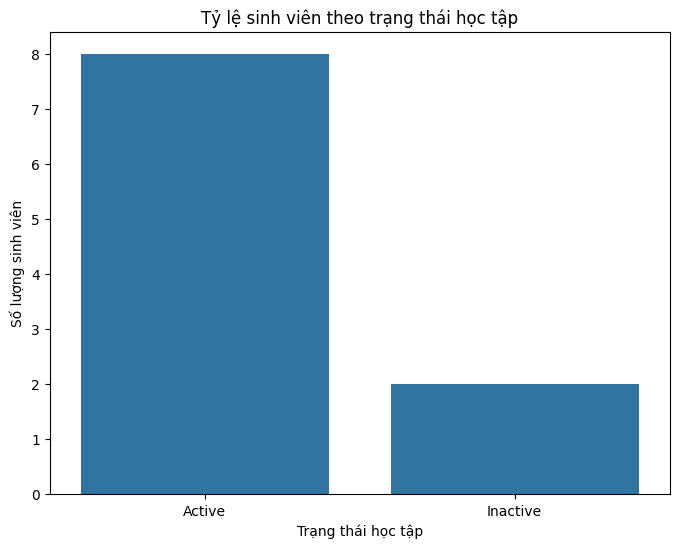

In [67]:
# Giả sử status_analysis là một Spark DataFrame
# 1. Tỷ lệ sinh viên theo trạng thái học tập
status_summary = status_analysis.groupBy("Status").sum("Total_Students").orderBy("sum(Total_Students)", ascending=False)

# Thu thập kết quả từ Spark DataFrame
status_data = status_summary.collect()

# Tạo dữ liệu cho biểu đồ
status_labels = [row['Status'] for row in status_data]
status_values = [row['sum(Total_Students)'] for row in status_data]

# Vẽ biểu đồ 1: Tỷ lệ sinh viên theo trạng thái học tập
plt.figure(figsize=(8, 6))
sns.barplot(x=status_labels, y=status_values)
plt.title("Tỷ lệ sinh viên theo trạng thái học tập")
plt.xlabel("Trạng thái học tập")
plt.ylabel("Số lượng sinh viên")
plt.show()

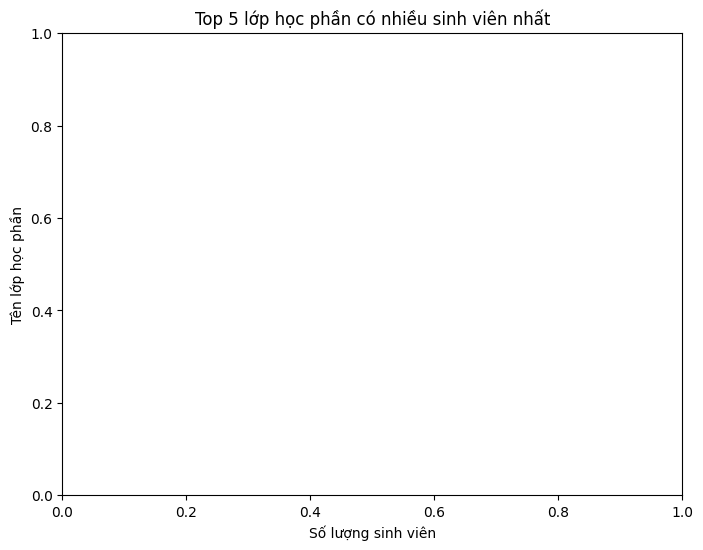

In [68]:
# 2. Top 5 lớp học phần có nhiều sinh viên nhất
top_courses_summary = top_courses.groupBy("Course_Name").sum("Total_Students").orderBy("sum(Total_Students)", ascending=False)

# Thu thập kết quả từ Spark DataFrame
top_courses_data = top_courses_summary.collect()

# Tạo dữ liệu cho biểu đồ
top_courses_labels = [row['Course_Name'] for row in top_courses_data]
top_courses_values = [row['sum(Total_Students)'] for row in top_courses_data]

# Vẽ biểu đồ 2: Top 5 lớp học phần có nhiều sinh viên nhất
plt.figure(figsize=(8, 6))
sns.barplot(x=top_courses_values[:5], y=top_courses_labels[:5])
plt.title("Top 5 lớp học phần có nhiều sinh viên nhất")
plt.xlabel("Số lượng sinh viên")
plt.ylabel("Tên lớp học phần")
plt.show()

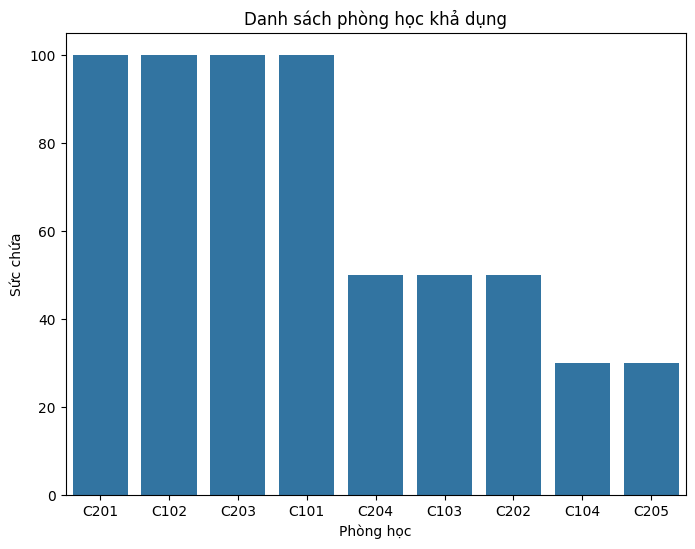

In [69]:
# 3. Phân bổ phòng học khả dụng
available_rooms_summary = available_rooms.groupBy("Room_ID").sum("Capacity").orderBy("sum(Capacity)", ascending=False)

# Thu thập kết quả từ Spark DataFrame
available_rooms_data = available_rooms_summary.collect()

# Tạo dữ liệu cho biểu đồ
room_labels = [row['Room_ID'] for row in available_rooms_data]
room_values = [row['sum(Capacity)'] for row in available_rooms_data]

# Vẽ biểu đồ 3: Phân bổ phòng học khả dụng
plt.figure(figsize=(8, 6))
sns.barplot(x=room_labels, y=room_values)
plt.title("Danh sách phòng học khả dụng")
plt.xlabel("Phòng học")
plt.ylabel("Sức chứa")
plt.show()

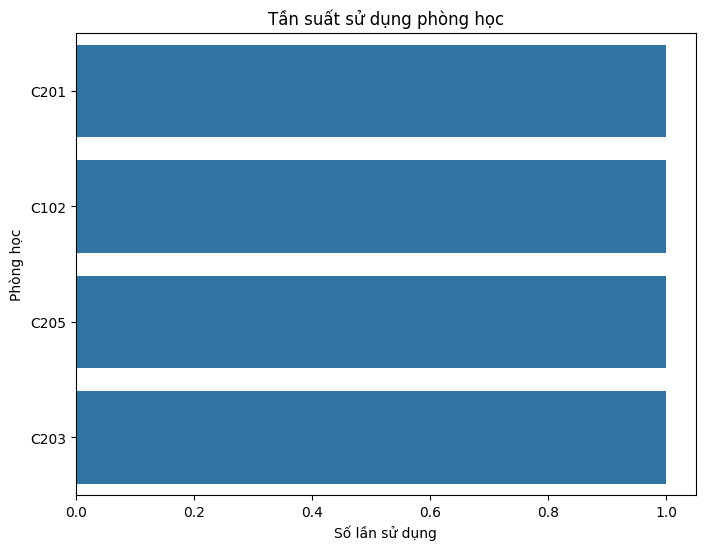

In [70]:
# 4. Tần suất sử dụng phòng học
room_usage_summary = room_usage.groupBy("Room_ID").sum("Usage_Frequency").orderBy("sum(Usage_Frequency)", ascending=False)

# Thu thập kết quả từ Spark DataFrame
room_usage_data = room_usage_summary.collect()

# Tạo dữ liệu cho biểu đồ
usage_labels = [row['Room_ID'] for row in room_usage_data]
usage_values = [row['sum(Usage_Frequency)'] for row in room_usage_data]

# Vẽ biểu đồ 4: Tần suất sử dụng phòng học
plt.figure(figsize=(8, 6))
sns.barplot(x=usage_values, y=usage_labels)
plt.title("Tần suất sử dụng phòng học")
plt.xlabel("Số lần sử dụng")
plt.ylabel("Phòng học")
plt.show()

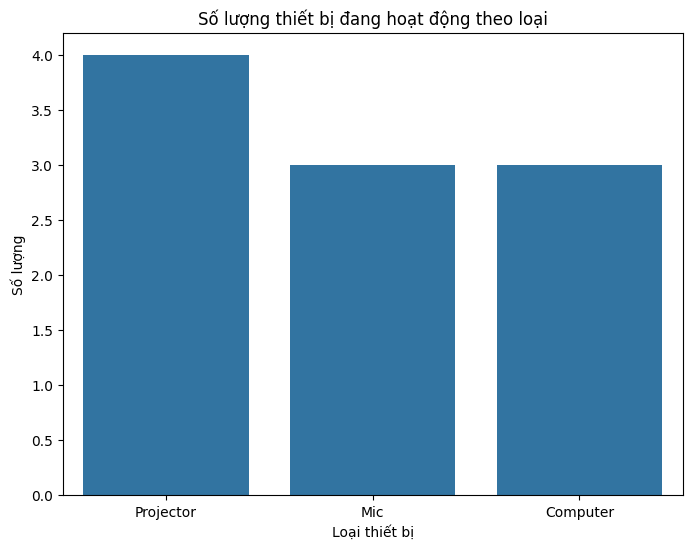

In [71]:
# 5. Trạng thái thiết bị đang hoạt động
device_status_summary = device_status.groupBy("Device_Type").sum("Total_Working").orderBy("sum(Total_Working)", ascending=False)

# Thu thập kết quả từ Spark DataFrame
device_status_data = device_status_summary.collect()

# Tạo dữ liệu cho biểu đồ
device_labels = [row['Device_Type'] for row in device_status_data]
device_values = [row['sum(Total_Working)'] for row in device_status_data]

# Vẽ biểu đồ 5: Trạng thái thiết bị đang hoạt động
plt.figure(figsize=(8, 6))
sns.barplot(x=device_labels, y=device_values)
plt.title("Số lượng thiết bị đang hoạt động theo loại")
plt.xlabel("Loại thiết bị")
plt.ylabel("Số lượng")
plt.show()

Giải thích:

    Thu thập Dữ liệu Spark: Dữ liệu từ Spark DataFrame được thu thập bằng phương thức .collect() để chuyển thành danh sách, sau đó được sử dụng để tạo các biểu đồ.
    Biểu đồ: Mỗi biểu đồ được vẽ bằng cách sử dụng sns.barplot() với dữ liệu từ Spark DataFrame được chuyển thành các danh sách.
    Trực tiếp với Spark: Không cần chuyển đổi sang Pandas để vẽ các biểu đồ, giúp giảm thiểu các vấn đề liên quan đến bộ nhớ khi làm việc với dữ liệu lớn.

Lưu ý:

    Đảm bảo rằng các tên cột (ví dụ: 'Status', 'Total_Students') trong mã trên trùng với tên cột trong DataFrame của bạn.
    Nếu bạn có dữ liệu quá lớn, tránh sử dụng .collect() vì nó có thể gây tràn bộ nhớ. Trong trường hợp đó, bạn có thể thực hiện phân trang dữ liệu hoặc chỉ lấy một số ít kết quả.